#Διακριτός Μετασχηματισμός Fourier

O μετασχηματισμός Fourier χρησιμοποιείται για την ανάλυση των χαρακτηριστικών συχνότητας ενός σήματος. Για τις εικόνες χρησιμοποιείται ο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (DFT) ο οποίος δίνεται από τη σχέση 

$$F(u,v)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} f(x,y)e^{-j2π(ux/M+vy/N)}\;(1)$$ 

όπου $F(x,y)$ είναι μια ψηφιακή εικόνα διαστάσεων ΜxN. H εξίσωση (1) θα πρέπει να υπολογιστεί για τις τιμές των διακριτών μεταβλητών $u$ και $v$ στις περιοχές $u=0,1,2,\cdots,Μ-1$ και $v=0,1,2,\cdots,N-1$.

Εάν γνωρίζουμε το μετασχηματισμό $F(u,v)$, μπορούμε να υπολογίζουμε τη συνάρτηση $f(x,y)$ χρησιμοποιώντας τον αντίστροφο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (ΙDFT)
$$f(x,y)=\frac{1}{MN} \sum_{u=0}^{M-1}\sum_{v=0}^{N-1} F(u,v)e^{-j2π(ux/M+vy/N)}\;(2)$$ 

για τις τιμές των διακριτών μεταβλητών $x$ και $y$ στις περιοχές $x=0,1,2,\cdots,Μ-1$ και $y=0,1,2,\cdots,N-1$.

Οι εξισώσεις (1) και (2) αποτελούν το ζεύγος των δισδιάστατων μετασχηματισμών Fourier.

## Φάσμα Fourier και γωνία φάσης

Ο μετασχηματισμός Fourier είναι στη γενική περίπτωση μιγαδική ποσότητα, οπότε μπορεί να εκφραστεί σε πολικές συντεταγμένες ως εξής:

$$F(u,v)=|F(u,v)|e^{-jφ(u,v)}\;(3)$$ 

με το μέτρο: $|F(u,v)|=[R^2(u,v)+I^2(u,v)]^{1/2}\;(4)$ 
να ονομάζεται *φάσμα Fourier* ή *φάσμα συχνοτήτων*

και την ποσότητα: $φ(u,v)=arctan[\frac{I(u,v)}{R(u,v)}]\;(5)$ 

να ονομάζεται *γωνία φάσης*.

In [2]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from skimage import data

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from scipy.fftpack import dct
import matplotlib.pylab as pylab
#from scipy import ndimage, misc
#import math 

#%matplotlib inline
#pylab.rcParams['figure.figsize'] = (20.0, 7.0)
#import numpy as np
#import numpy.fft
import timeit

#% matplotlib inline 
#from PIL import Image
#import scipy.fftpack as fp
from scipy import ndimage, misc, signal, stats
from skimage import data, img_as_float
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray
from skimage.transform import rescale
#import matplotlib.pylab as pylab


### Δημιουργία μιας δοκιμαστικής εικόνας και εφαρμογή FFT 

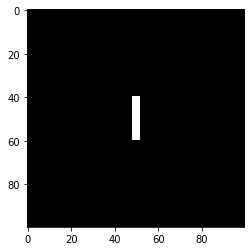

In [3]:
#Αρχική εικόνα
im = np.zeros((100, 100)) # sample 2D array
im[40:60,48:52]=1

# Απεικόνιση
plt.imshow(im, cmap="gray")
plt.show()

# Υπολογισμός μεγέθος εικόνας
imsize = im.shape
height = im.shape[0]
width = im.shape[1]

In [4]:
# Εφαρμογή fft2 σε ολόκληρη την εικόνα
im_fft=fft2(im)

# Υπολογισμός φάσματος και γωνίας φάσης
amplitudeFFT=abs(abs(im_fft))
angleFFT=np.angle(im_fft)


##Ιδιότητες μετασχηματισμού Fourier
### 1. Περιοδικότητα
Ο δισδιάστατος διακριτός μετασχηματισμός Fourier 2D (DFT) και ο αντίστροφός του είναι περιοδικές συναρτήσεις άπειρης διάρκειας κατά τις διευθύνσεις των μεταβλητών $u$ και $v$:

$F(u,v)=F(u+k_{1}M,v)=F(u,v+k_{2}N)=F(u+k_{1}M,v+k_{2}N)$ 

και 

$f(x,y)=f(x+k_{1}M,y)=f(x,y+k_{2}N)=f(x+k_{1}M,y+k_{2}N)$


> ![Σχήμα 1](https://drive.google.com/uc?id=1yXWfwWWcNy0NUU-f-aMARmFDB3vmKrGB)

> O μετασχηματισμό Fourier μπορεί να μετατοπιστεί, με σκοπό να κεντραριστεί, πολλαπλασιάζοντας τη συνάρτηση f(x) με την ποσότητα $(-1)^x$ πριν τον υπολογισμό της συνάρτησης F(u).

> ![Σχήμα 2](https://drive.google.com/uc?id=1jPaA2lPad06pcVIbuweC9ZrUL6JRljbP)

>Ομοίως και ο 2D DFT, η συνεχής γραμμή αποτελεί ένα πίνακα δεδομένων $F(u,v)$, διαστάσεων $MxN$, που προκύπτει από την εξίσωση (1). Η μετατόπιση του προκύπτει πολλαπλασιάζοντας την $f(x,y)$ με την ποσότητα $(-1)^{x+y}$ πριν τον υπολογισμό της $F(u,v)$, μας δίνει μια πλήρη και κεντραρισμένη περίοδο. 



In [8]:
# Κεντράρισμα φάσματος
im_ffts=fftshift(im_fft)

Στην Εικόνα 2 (FFT Μ/Σ στην αρχική εικόνα) απεικονίζεται το φάσμα της Εικόνας 1 (Αρχική εικόνα)
.  

Η αρχή του συστήματος συντεταγμένων τόσο στο πεδίο του χώρου όσο και στο πεδίο των συχνοτήτων είναι η άνω αριστερή γωνία.

Όπως αναμέναμε η περιοχή γύρω από την αρχή του μετασχηματισμού περιέχει τις μεγαλύτερες τιμές. Οι γωνίες του πίνακα φάσματος, λόγω περιοδικότητας,  περιέχουν παρόμοιες υψηλές τιμές (Εικόνα 3. Εστίαση στην πάνω αριστερή γωνία των τιμών του φάσματος του FFT Μ/Σ). 

Προκειμένουν να κεντράρουμε το φάσμα, όπως αναφέραμε, πολλαπλασιάζουμε την $f(x,y)$ με την ποσότητα $(-1)^{x+y}$ πριν τον υπολογισμό της $F(u,v)$. Η συνάρτηση fftshift ουσιαστικά πραγματοποιεί αυτό το κεντράρισμα, εφαρμόζοντας και ένα λογαριθμικό μετασχηματισμό ($1+log|F(u,v)|$) για να εμφανιστεί και η δυναμική των άλλων εντάσεων στην εικόνα μαζί με το συνεχή όρο που κυριαρχεί στο φάσμα (Εικόνα 4. Κεντράρισμα του FFT φάσματος). 



Text(0.5, 1.0, 'Εικ.5.Γωνία φάσης αρχικής εικόνας')

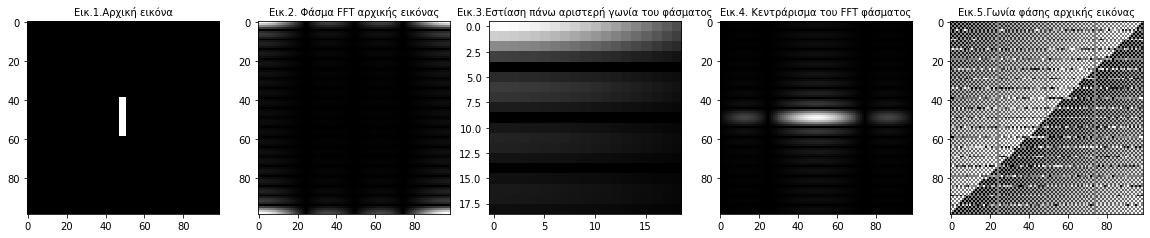

In [9]:
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im[1:height,1:width]),cmap='gray')
ax0.set_title('Εικ.1.Αρχική εικόνα', fontsize=10)

ax1.imshow(amplitudeFFT[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.2. Φάσμα FFT αρχικής εικόνας', fontsize=10)

ax2.imshow(amplitudeFFT[ 1:20,1:20],cmap='gray')
ax2.set_title('Εικ.3.Εστίαση πάνω αριστερή γωνία του φάσματος', fontsize=10)

ax3.imshow(abs(abs(im_ffts[1:height,1:width])),cmap='gray')
ax3.set_title('Εικ.4. Κεντράρισμα του FFT φάσματος', fontsize=10)

ax4.imshow(angleFFT[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.5.Γωνία φάσης αρχικής εικόνας', fontsize=10)


Τα διέλευσης από το μηδέν (zero-crossings) του φάσματος βρίσκονται πιο κοντά προς την κάθετη διεύθυνση, το ορθογώνιο που εμφανίζεται στην Εικ.1 έχει πιο μεγάλο μήκος προς αυτήν την διεύθυνση σε σχέση με την οριζόντια.

### Μετατόπιση εικόνας
Θα μετατοπίσουμε το ορθογώνιο στην εικόνα και θα υπολογίσουμε τον μετασχηματισμό Fourier.

In [10]:
# Μετατοπισμένη εικόνα
imt = np.zeros((100, 100)) # sample 2D array
imt[20:40,68:72]=1

# Υπολογισμός μεγέθους εικόνας
imsizet = imt.shape
heightt = imt.shape[0]
widtht = imt.shape[1]

# Υπολογισμός FFT (φάσμα και γωνία φάσης) 
im_fftt=fft2(imt)
amplitudeFFTΤ=abs(abs(im_fftt))
angleFFTT=np.angle(im_fftt)

#Κεντράρισμα φάσματος
im_fftst=fftshift(im_fftt)

Text(0.5, 1.0, 'Εικ.10. Γωνία φάσης μετατόπισης')

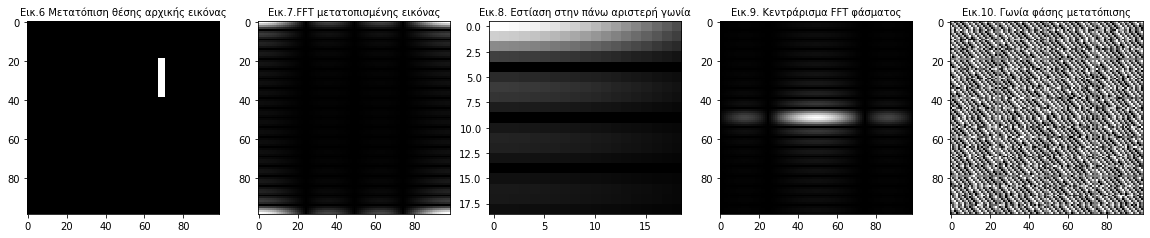

In [11]:
# Απεικόνιση εικόνων

f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(imt[1:height,1:width],cmap='gray')
ax0.set_title('Εικ.6 Μετατόπιση θέσης αρχικής εικόνας', fontsize=10)

ax1.imshow(amplitudeFFTΤ[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.7.FFT μετατοπισμένης εικόνας', fontsize=10)

ax2.imshow(amplitudeFFTΤ[1:20,1:20],cmap='gray')
ax2.set_title('Εικ.8. Εστίαση στην πάνω αριστερή γωνία', fontsize=10)

ax3.imshow(abs(im_fftst[1:height,1:width]),cmap='gray')
ax3.set_title('Εικ.9. Κεντράρισμα FFT φάσματος', fontsize=10)

ax4.imshow(angleFFTT[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.10. Γωνία φάσης μετατόπισης', fontsize=10)


Παρατηρούμε ότι κατά τη μετατόπιση της εικόνας, το φάσμα δεν μεταβάλλεται (αφού η απόλυτη τιμή του εκθετικού όρου είναι ίση με τη μονάδα - Εικόνα 4 και Εικόνα 9).  Επειδή οι Εικόνες 1 και 6 είναι διαφορετικές μεταξύ τους και τα φάσματά τους είναι ίδια, τότε (σύμφωνα με την εξίσωση 3) οι γωνίες φάσης τους θα πρέπει να είναι διαφορετικές. Πράγματι, κάτι τέτοιο ισχύει (Εικόνα 5 και Εικόνα 10).


Έπειτα, θα περιστρέψουμε την αρχική εικόνα κατά 45 μοίρες, θα εφαρμόσουμε τον FFT μετασχηματισμό, θα κεντράρουμε τις τιμές του φάσματος και θα τα απεικονίσουμε, όπως πριν.

In [12]:
# Περιστροφή εικόνας
im_45 = ndimage.rotate(im, 45, reshape=False)

# Υπολογισμός FFT (φάσμα και γωνία φάσης) 
im_fft45=fft2(im_45)
amplitudeFFT45=abs(abs(im_fft45))
angleFFT45=np.angle(im_fft45)

# Κεντράρισμα φάσματος
im_ffts45=fftshift(im_fft45)

Text(0.5, 1.0, 'Εικ.15. Γωνία φάσης')

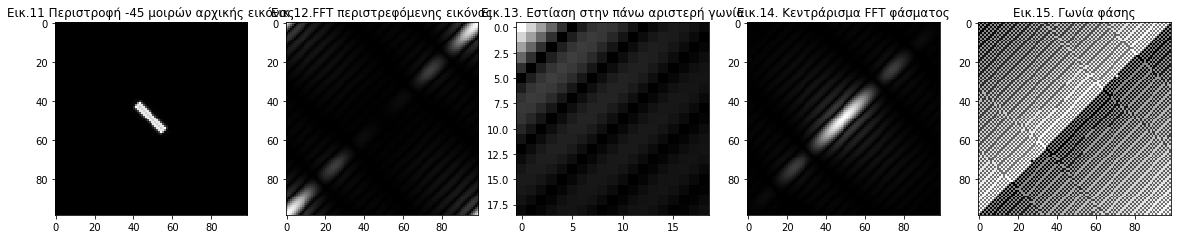

In [13]:
#Απεικονίσεις
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im_45[1:height,1:width]),cmap='gray')
ax0.set_title('Εικ.11 Περιστροφή -45 μοιρών αρχικής εικόνας', fontsize=12)

ax1.imshow(amplitudeFFT45[1:height,1:width],cmap='gray')
ax1.set_title('Εικ.12.FFT περιστρεφόμενης εικόνας', fontsize=12)

ax2.imshow(amplitudeFFT45[1:20,1:20],cmap='gray')
ax2.set_title('Εικ.13. Εστίαση στην πάνω αριστερή γωνία', fontsize=12)

ax3.imshow(abs(im_ffts45[1:height,1:width]),cmap='gray')
ax3.set_title('Εικ.14. Κεντράρισμα FFT φάσματος', fontsize=12)

ax4.imshow(angleFFT45[1:height,1:width],cmap='gray')
ax4.set_title('Εικ.15. Γωνία φάσης', fontsize=12)

Αν η αρχική εικόνα υποστεί περιστροφή π.χ. 45 μοιρών παρατηρούμε ότι το φάσμα της (Εικόνα 14) περιστρέφεται κατά την ίδια γωνία (σε σχέση με την Εικόνα 4).

Κοιτάζοντας το DFT ή το φάσµα µιας εικόνας (απεικόνιση του µέτρου
του DFT της εικόνας), µπορούµε να προσδιορίσουµε πολλά στοιχεία
σχετικά µε την εικόνα:
* Οι φωτεινές περιοχές στην DFT “εικόνα” αντιστοιχούν στις συχνότητες οι
οποίες έχουν µεγάλο µέτρο (ισχύ) στην πραγµατική εικόνα.
* Μεγάλες τιµές κοντά στο κέντρο του (µετατοπισµένου) DFT αντιστοιχούν
σε µεγάλες οµαλές περιοχές της εικόνας ή σε ισχυρά φωτεινό φόντο.

## 2. Συμμετρία
Κάθε μιγαδική συνάρτηση μπορεί να εκφραστεί ως το άθροισμα μίας άρτιας(συμμετρική) και μίας περιττής (αντισυμμετρική) συνιστώσας.

> ![Σχήμα 3](https://drive.google.com/uc?id=18omBQcIUWrLD26uPDJ2oP6O9CPymJHBG)

Ο μετασχηματισμός Fourier μιας πραγματικής συνάρτησης είναι συζυγώς συμμετρικός (Σχέση 1 του παραπάνω πίνακα), κάτι που υπονοεί ότι το φάσμα θα χαρακτηρίζεται από άρτια συμμετρία ως προς την αρχή των αξόνων, οπότε $F(0,0)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)$.

Από την εξίσωση (3) προκύπτει το συμπέρασμα πως ο όρος που αντιστοιχεί στη μηδενική συχνότητα είναι ανάλογος της μέσης τιμής της συνάρτησης $f(x,y)$ : $F(0,0)=ΜΝ|\overline{f}(x,y)|$.

Επειδή η σταθερά αναλογίας $ΜΝ$ έχει μεγάλη τιμή, η $|F(0,0)|$ αποτελεί, στις πιο πολλές περιπτώσεις, τη μεγαλύτερη συνιστώσα του φάσματος (αρκετές τάξεις μεγέθους σε σχέση με τους υπόλοιπους όρους). 

Επειδή οι συνιστώσες συχνότητας u,v είναι μηδέν στην αρχή του συστήματος συντεταγμένων, η $F(0,0)$ ονομάζεται **dc συνιστώσα** του μετασχηματισμού.


## Ιδιότητες μετασχηματισμού FFT σε πραγματικές εικόνες

Μεταβείτε στην <a href="https://colab.research.google.com/drive/1Lu0Lc0sfEM6QrA1i_1LU9tj0cmOIu6CZ#scrollTo=W4FXMjXautUo">Άσκηση 1</a> 



# Συνέλιξη
---



Η δισδιάστατη κυκλική συνέλιξη για τις τιμές $x=0,1,2,\cdots,Μ-1$ και $y=0,1,2,\cdots,N-1$ δίνεται από την ακόλουθη έκφραση:

$$f(x,y)*h(x,y)=\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} f(x,y)h{x-m,y-n)}$$ 

Το δισδιάστατο θεώρημα της συνέλιξης δίδεται από τη σχέση :

$$f(x,y)*h(x,y)\Leftrightarrow(F(u,v)H(u,v))$$ 
και αντίστροφα $$f(x,y)h(x,y)\Leftrightarrow(F(u,v)*H(u,v))$$

Το διπλό βέλος επισημαίνει ότι το δεξί και το αριστερό μέλος συνιστούν ένα ζεύος ευθέως και αντίστροφου μετασχηματισμού Fourier.


H σχέση $$f(x,y)*h(x,y)\Leftrightarrow(F(u,v)H(u,v))$$  

αποτελεί το θεμέλιο της θεωρίας του γαμμικού φιλτραρίσματος. Η λειτουργία της απεικονίζεται στην παρακάτω εικόνα.


![Σχήμα 4](https://drive.google.com/uc?id=1q36Fc8woGoBWRKBRSC6p6g9K2GpeC9dI)



Πρακτικά, τη λειτουργία της συνέλιξης σε μία εικόνα μπορούμε να τη φανταστούμε ως ένα σταθερό "φίλτρο" που περνάει πάνω από αυτήν εικόνα. Ας θεωρήσουμε ότι έχουμε μια εικόνα $5 \times 5$.

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-13-pm.png?w=254&h=230)

Επίσης ορίζουμε το παρακάτω φίλτρο $3 \times 3$.

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=148&h=128)

Η πράξη της συνέλιξης μεταξύ των δυο φαίνεται στο παρακάτω σχήμα.

![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)

# Φιλτράρισμα εικόνας στο πεδίο της συχνότητας
Η επεξεργασία των εικόνων στο πεδίο της συχνότητας στοχεύει στην βελτίωση της λαµβάνοντας υπόψη την κατανοµή των συχνοτήτων της εικόνας:
* Στις εικόνες οι συχνότητες αντιπροσωπεύουν την ταχύτητα µεταβολής της φωτεινότητας ή του χρώµατος.
* Υπάρχουν δύο κατευθύνσεις µεταβολής της φωτεινότητας ή του χρώµατος, η οριζόντια και η κάθετη.
* Επεξεργασία στο πεδίο της συχνότητας εφαρµόζεται µε την εφαρµογή φιλτραρίσµατος. 

Γενικά:

*   Χαμηλές συχνότητες: αντιστοιχούν σε μικρές μεταβολές των χαρακτηριστικών της εικόνας

*   Υψηλές συχνότητες: αντιστοιχούν σε απότομες μεταβολές όπως θόρυβος ή περιγράμματα αντικειμένων της εικόνας


## Βαθυπερατά φίλτρα (Low pass filters)
**Ιδιότητες**
* Φιλτράρουν τις υψηλές συχνότητες (σήματα θορύβου).
* Λειαίνουν απότομες μεταβολές στην ένταση
* Θολώνουν την εικόνα (blurring).

*Βασικές κατηγορίες βαθυπερατών φίλτρων*
* Φίλτρα μέσης τιμής (mean filters)
* Φίλτρα Gaussian μορφής (Gaussian filters)
* Φίλτρα Butterworth , Chebyshev κλπ
* Φίλτρα διάμεσης τιμής (median filters)
* Μη γραμμικά φίλτρα (harmonic κλπ)

## Υψιπερατά φίλτρα (High pass filters)
**Ιδιότητες**
* Εξασθενούν τις χαμηλές συχνότητες σε μία εικόνα και τονίζουν τις υψηλές
* Τονίζουν τις μεταβολές της εικόνας (contrast, ανάδειξη ακµών)
* Δίνουν έμφαση στις λεπτομέρειες
* Ενισχύουν τον θόρυβο

Ο απλόυστερος τρόπος για τον υπολογισµό της συνάρτησης µεταφοράς ενός υψιπερατού φίλτρου είναι χρησιµοποιώντας τη σχέση $Η_{high}=1-H_{low}$ όπου $Η_{low}$ η συνάρτηση µεταφοράς του αντίστοιχου βαθυπερατού φίλτρου.

## Φίλτρο Gaussian δύο διαστάσεων

**Ορισμός**: $$Η(u,v)=e^{\frac{-D^2(u,v)}{2σ^2}}$$

όπου η ποσότητα $D(u,v)$ εκφράζει τη απόσταση από το κέντρο του τετραγώνου συχνοτήτων. 

![Σχήμα 4](https://drive.google.com/uc?id=1lfRz6Ku0c31LAWyFMshyHQGcI4o6zifC)

Θέτοντας $σ=D_0$ μπορούμε να περιγράψουμε και άλλα φίλτρα ως εξής ¨

$$Η(u,v)=e^{\frac{-D^2(u,v)}{2D^2_0}}$$

 όπου $D_0$ είναι η συχνότητα αποκοπής.
Εάν  $D(u,v)=D_0$ τότε το βαθυπερατό φίλτρο Gauss ελλλαττώνεται στο 0.607 της μέγιστης τιμής του.



Στη συνέχεια δίνουμε τύπους βαθυπερατών φίλτρων όπου $D_0$ είναι η συχνότητα αποκοπής και $n$ η τάξη του φίλτρου


Ιδανικό φίλτρο:  $H(u,v)=\Big\{
\begin{matrix}
    1, D(u,v)\leq{D_0}\\
    0, D(u,v)\geq{D_0} \\    
\end{matrix}$



Φίλτρο τύπου Butterworth: $H(u,v)=\frac{1}{1+(D(u,v)/D_0)^{2n}}$



Φίλτρο τύπου Gauss:$H(u,v)=e^{\frac{-D^2(u,v)}{2D^2_0}}$

## Παράδειγμα: Εξομάλυνση εικόνας με εφαρμογή βαθυπερατού φίλτρου τύπου Gauss

In [14]:
# Φόρτωση εικόνας
im11 = data.coins()
im11h=im11.shape[0]
im11w=im11.shape[1]

# Δημιουργία Gaussian φίλτρο στο μέγεθος της εικόνας με σ=10
# Δοκιμάζοντας διαφορετικές τιμές στο σ, παρατηρώ την επίδρασή του στην εικόνα.

sigma=10
gauss_kernel = np.outer(signal.gaussian(im11.shape[0], sigma), signal.gaussian(im11.shape[1], sigma))

# Εφαρμογή FFT στην εικόνα
freq = fft2(im11)

assert(freq.shape == gauss_kernel.shape)

# Προετοιμασία φίλτρο για συνέλιξη με εικόνα
freq_kernel = fft2(ifftshift(gauss_kernel))

# Σύμφωνα με το θεώρημα της συνέλιξης, στο πεδίο της συχνότητας απλά πολλαπλασιάζουμε τους πίνακες
convolved = freq*freq_kernel 

# Το αποτέλεσμα το υπολογίζουμε πίσω στο πεδίο του χώρου
im111 = ifft2(convolved).real

Text(0.5, 1.0, 'Η εικόνα μετά την εφαρμογή της συνέλιξης')

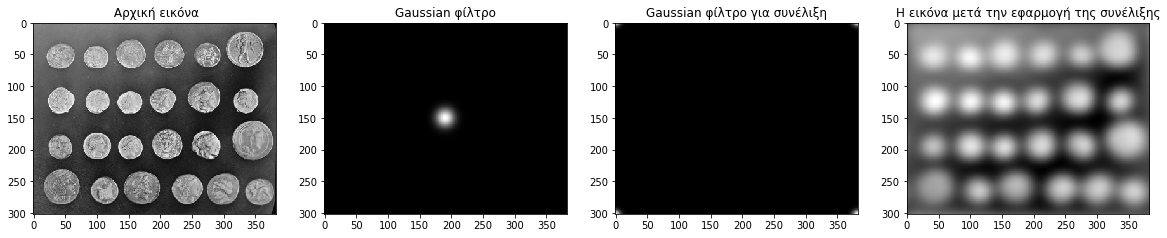

In [15]:
#Απεικονίσεις
f, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 15))

ax0.imshow((im11[1:im11h,1:im11w]),cmap='gray')
ax0.set_title(' Aρχική εικόνα', fontsize=12)

ax1.imshow(abs(gauss_kernel[1:im11h,1:im11w]),cmap='gray')
ax1.set_title('Gaussian φίλτρο', fontsize=12)

ax2.imshow(abs(freq_kernel[1:im11h,1:im11w]),cmap='gray')
ax2.set_title('Gaussian φίλτρο για συνέλιξη', fontsize=12)

ax3.imshow(abs(im111[1:im11h,1:im11w]),cmap='gray')
ax3.set_title('Η εικόνα μετά την εφαρμογή της συνέλιξης', fontsize=12)

Το Gaussian φίλτρο σε 3D αναπαράσταση

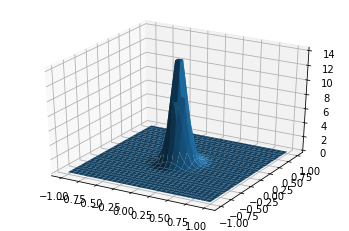

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

# ορισμός σ
sigma = np.array([0.1, 0.1])

covariance = np.diag(sigma**2)
z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()


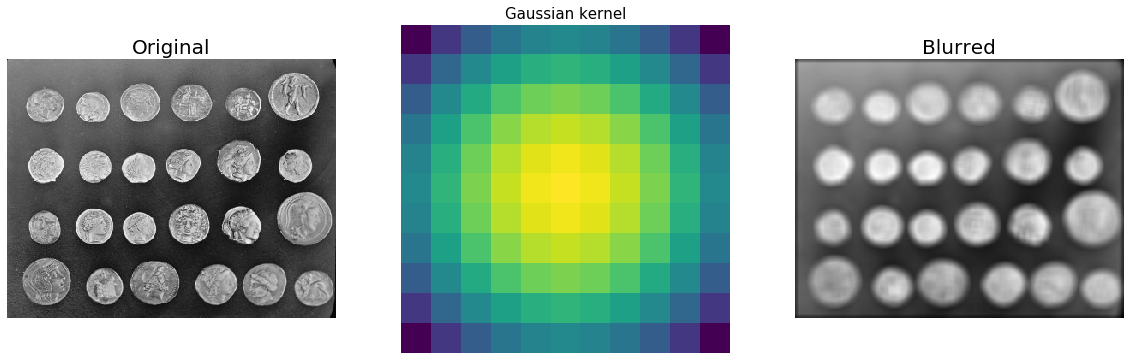

In [17]:
# Δημιουργία Gaussian φίλτρου συγκεκριμένων διαστάσεων
gauss_kernel = np.outer(signal.gaussian(11, 10), signal.gaussian(11, 10)) # 2D Gaussian kernel of size 11x11 with σ = 3

# Συνέλιξη της εικόνας με το φίλτρο με χρήση συνάρτησης fftconvolve
im_blurred = signal.fftconvolve(im11, gauss_kernel, mode='same')

# Απεικονίσεις
fig, (ax_original, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20,8))

ax_original.imshow(im11, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()


ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()

fig.show()

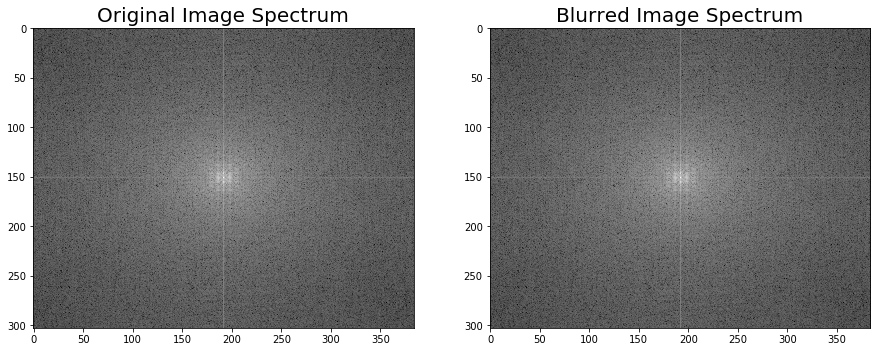

In [18]:
# Απεικονίσεις φασμάτων αρχικής και θολωμένης εικόνας
F1 = fft2((im11).astype(float))
F2 = fftshift( F1 )

pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)

F1b = fft2((im_blurred).astype(float))
F2b = fftshift(F1)

pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2b)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)

pylab.show()

# Λόγος σήματος προς θόρυβο
Το SNR ορίζεται ως ο λόγος ισχύος σήματος προς την ισχύ θορύβου, συχνά εκφράζεται σε db.

Αναλογία μεγαλύτερη από 1: 1 (μεγαλύτερη από 0 dB) δείχνει περισσότερο σήμα από το θόρυβο.

In [19]:
# ορισμός SNR
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

## Βαθυπερατά φίλτρα - Low-pass filter (LPF)

### Δημιουργία Φίλτρο Gaussian 

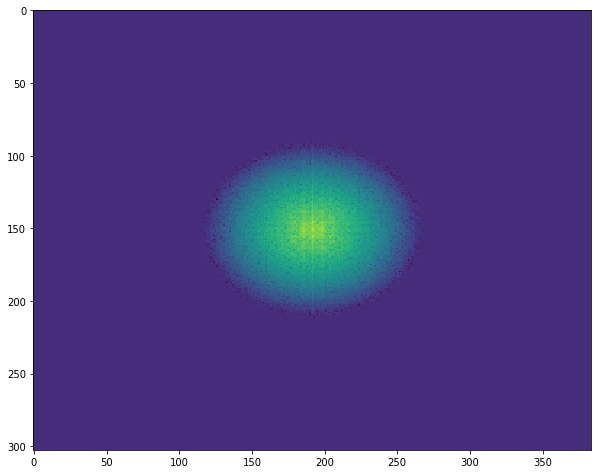

In [20]:
#Χρησιμοποιούμε την έτοιμη συνάρτηση fourier_gaussian
freq = fft2(im11)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im111 = ifft2(freq_gaussian)

# Απεικόνιση
pylab.show()
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +fftshift(freq_gaussian))).astype(int))
pylab.show()

### Δημιουργία βαθυπερατού φίλτρου

1.8316158895439376


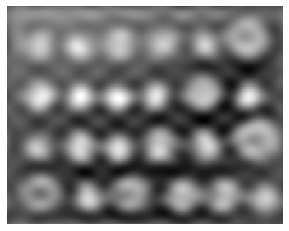

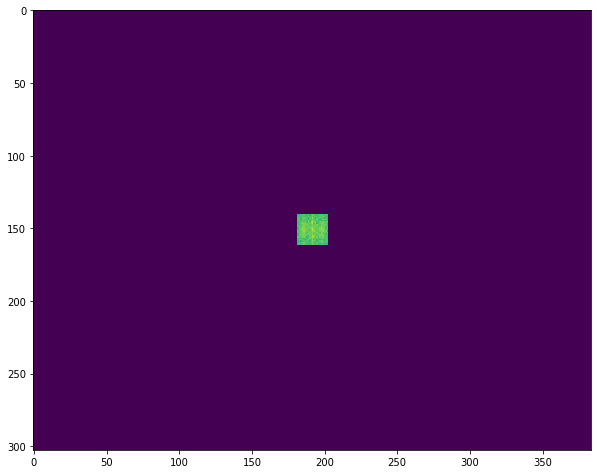

In [21]:
# low pass filter halftoning 
freq = fft2(im11)

(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)

freq1 = np.copy(freq)
freq2 = fftshift(freq1)

freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # block the low frequencies

freq2 -= freq2_low # select only the first 20x20 (low) frequencies, block the high frequencies

im111 = ifft2(ifftshift(freq2)).real

print(signaltonoise(im11, axis=None))

pylab.imshow(im111, cmap='gray'), pylab.axis('off')
pylab.show()
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

Θα δημιουργήσουμε βαθυπερατά συχνοτικά φίλτρα διαφορετικής διάστασης για αποκοπή υψηλών συχνοτήτων και θα δούμε τί επίδραση έχουν στην εικόνα.

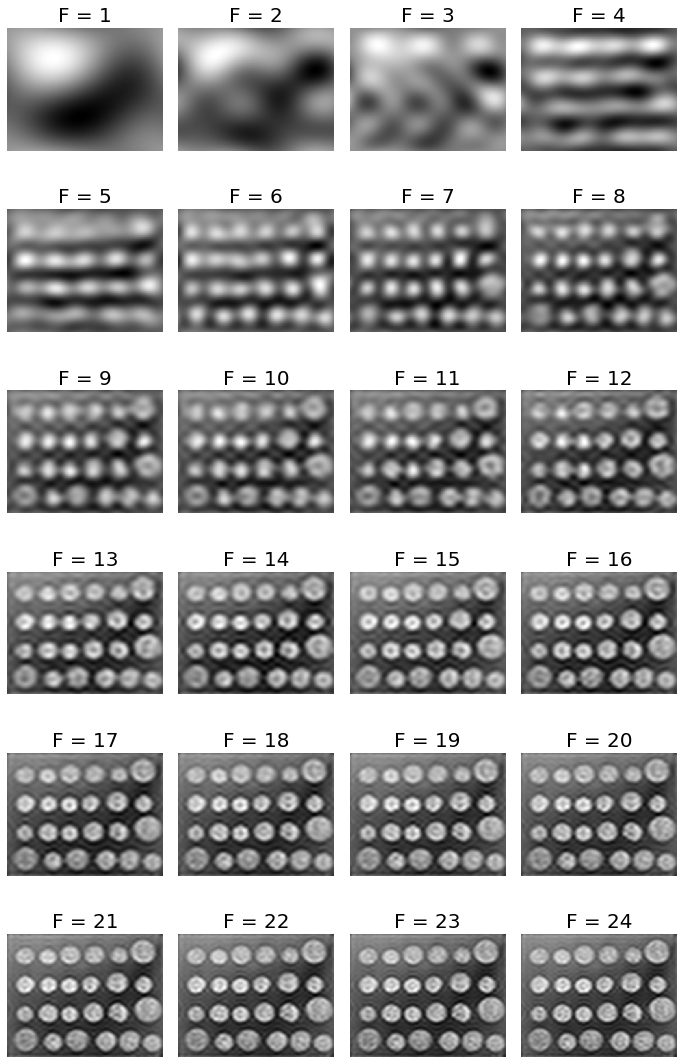

In [22]:
freq = fft2(im11)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)

snrs_lp = []
ubs = list(range(1,25))

pylab.figure(figsize=(12,20))

for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftshift(freq1) 

    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0

    freq2 -= freq2_low # select only the first 20x20 (low) frequencies

    im111 = ifft2(ifftshift(freq2)).real
    
    snrs_lp.append(signaltonoise(im111, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im111, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)

pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

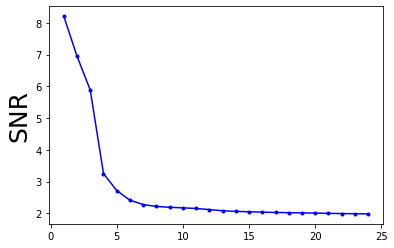

In [23]:
#Υπολογισμός SNR για τα φίλτρα

snr = signaltonoise(im11, axis=None)
pylab.plot(ubs, snrs_lp, 'b.-')
pylab.xlabel('', size=25)
pylab.ylabel('SNR', size=25)
pylab.show()

### Ανακατασκευή εικόνας με Gaussian φίλτρο

1.0 254.99999999999997


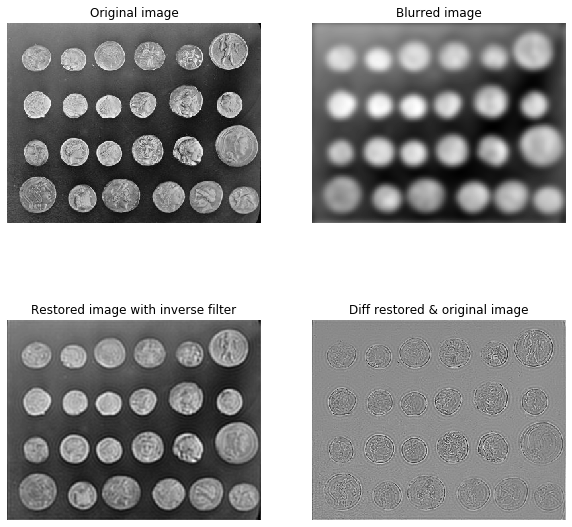

In [24]:
# ορισμός φίλτρου Gauss
sigma=5
gauss_kernel = np.outer(signal.gaussian(im11.shape[0], sigma), signal.gaussian(im11.shape[1], sigma))

# Θόλωμα εικόνας
freq = fft2(im11)
freq_kernel = fft2(ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem
im_blur = ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize

# συνέλιξη στο πεδίο των συχνοτήτων της θολωμένης εικόνας με το συχνοτικό φίλτρο Gauss της αρχικής εικόνας 
epsilon = 10**-6
freq = fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = ifft2(convolved).real

# ανακατασκευασμένη εικόνα
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))

pylab.figure(figsize=(10,10))
pylab.gray()
pylab.subplot(221), pylab.imshow(im11), pylab.title('Original image'), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_blur), pylab.title('Blurred image'), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_restored - im11), pylab.title('Diff restored & original image'), pylab.axis('off')
pylab.show()

## Υψιπερατά φίλτρα (High-Pass Filter (HPF))

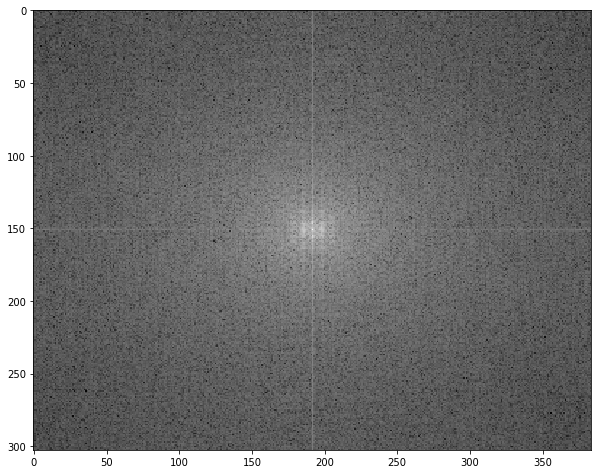

(<Figure size 720x720 with 1 Axes>,
 None)

In [25]:
freq = fft2(im11)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

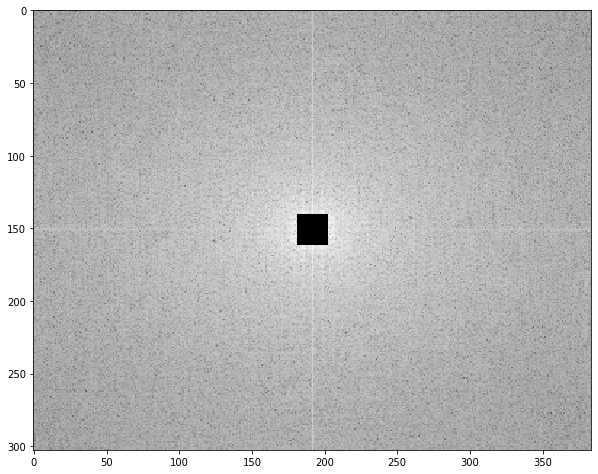

In [26]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

0.5363836982713017


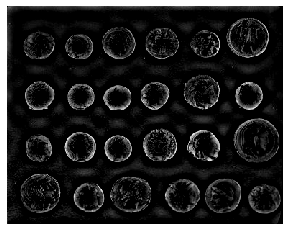

(<matplotlib.image.AxesImage at 0x2cb201a1fc8>,
 (-0.5, 383.5, 302.5, -0.5),
 None)

In [27]:
im22 = np.clip(ifft2(ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
print(signaltonoise(im22, axis=None))
# 0.5901647786775175
pylab.imshow(im22, cmap='gray'), pylab.axis('off'), pylab.show()

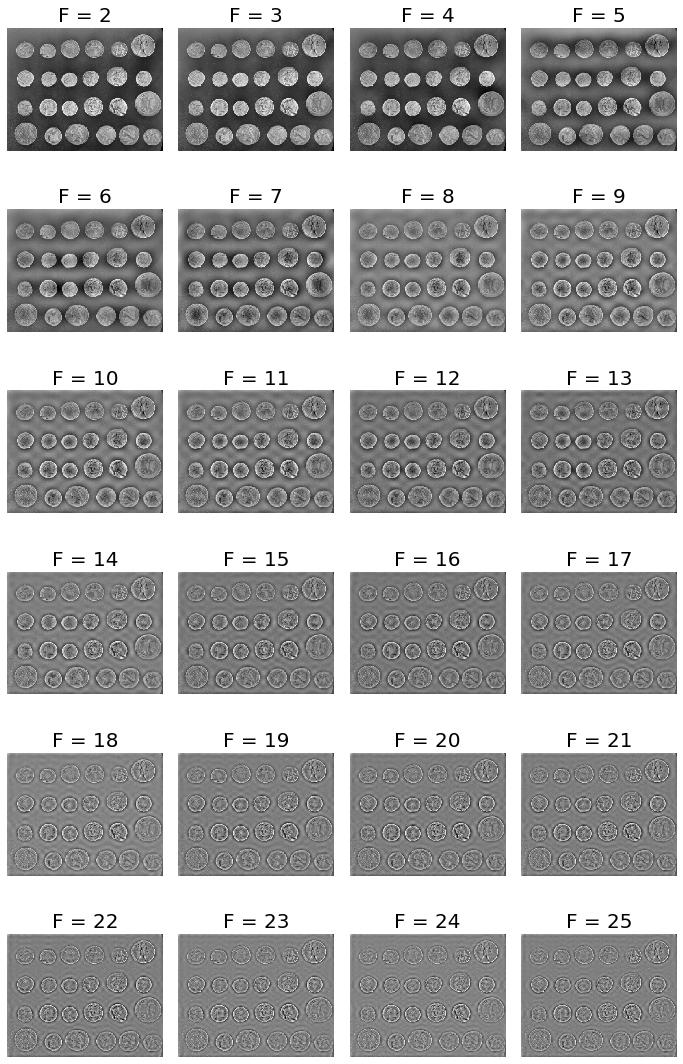

In [28]:
freq = fft2(im11)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []

hbs = list(range(1,25))
pylab.figure(figsize=(12,20))
for h in hbs:
    freq1 = np.copy(freq)
    freq2 = fftshift(freq1)
    freq2[half_w-h:half_w+h+1,half_h-h:half_h+h+1] = 0 # select all but the first lxl (low) frequencies

    im11 = ifft2(ifftshift(freq2)).real
    snrs_hp.append(signaltonoise(im11, axis=None))
    pylab.subplot(6,4,h), pylab.imshow(im11, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(h+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

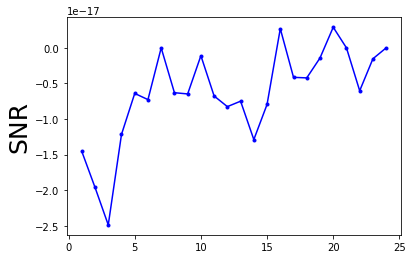

In [29]:
pylab.plot(hbs, snrs_hp, 'b.-')
pylab.xlabel('', size=25)
pylab.ylabel('SNR', size=25)
pylab.show()

### Βιβλιογραφία                                                                   
Κεφάλαιο 4. Φιλτράρισμα στο πεδίο των συχνοτήτων,  

Ψηφιακή Επεξεργασία Εικόνας,

Συγγραφείς R.Gonzalez & R.Woods, Επιμέλεια μετάφρασης: Σ. Κόλλιας, 

Εκδόσεις Τζιόλας, 4η Έκδοση